# Exploratory Data Analysis

##### We perform EDA in this notebook to better understand the characteristics of our data before fitting models to it.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython import nominal


In [42]:
train = pd.read_csv(r"C:\Users\malli\Documents\GitHub\Big-Mart-Sales-Prediction-Practice-Problem--\Datasets\train_cleaned.csv")
test = pd.read_csv(r"C:\Users\malli\Documents\GitHub\Big-Mart-Sales-Prediction-Practice-Problem--\Datasets\test_cleaned.csv")

In [43]:
combined = pd.concat([train, test], ignore_index=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item                       14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet                     14204 non-null  object 
 7   Years_Since_Establishment  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


## Univariate Analysis

### Numeric Columns Analysis

In [44]:
combined_num_cols = combined.select_dtypes(include=['float64', 'int64'])
train_num_cols = train.select_dtypes(include=['float64', 'int64'])
test_num_cols = test.select_dtypes(include=['float64', 'int64'])

In [45]:
import warnings
warnings.simplefilter("ignore")


#### Data Structure/Distribution Analysis

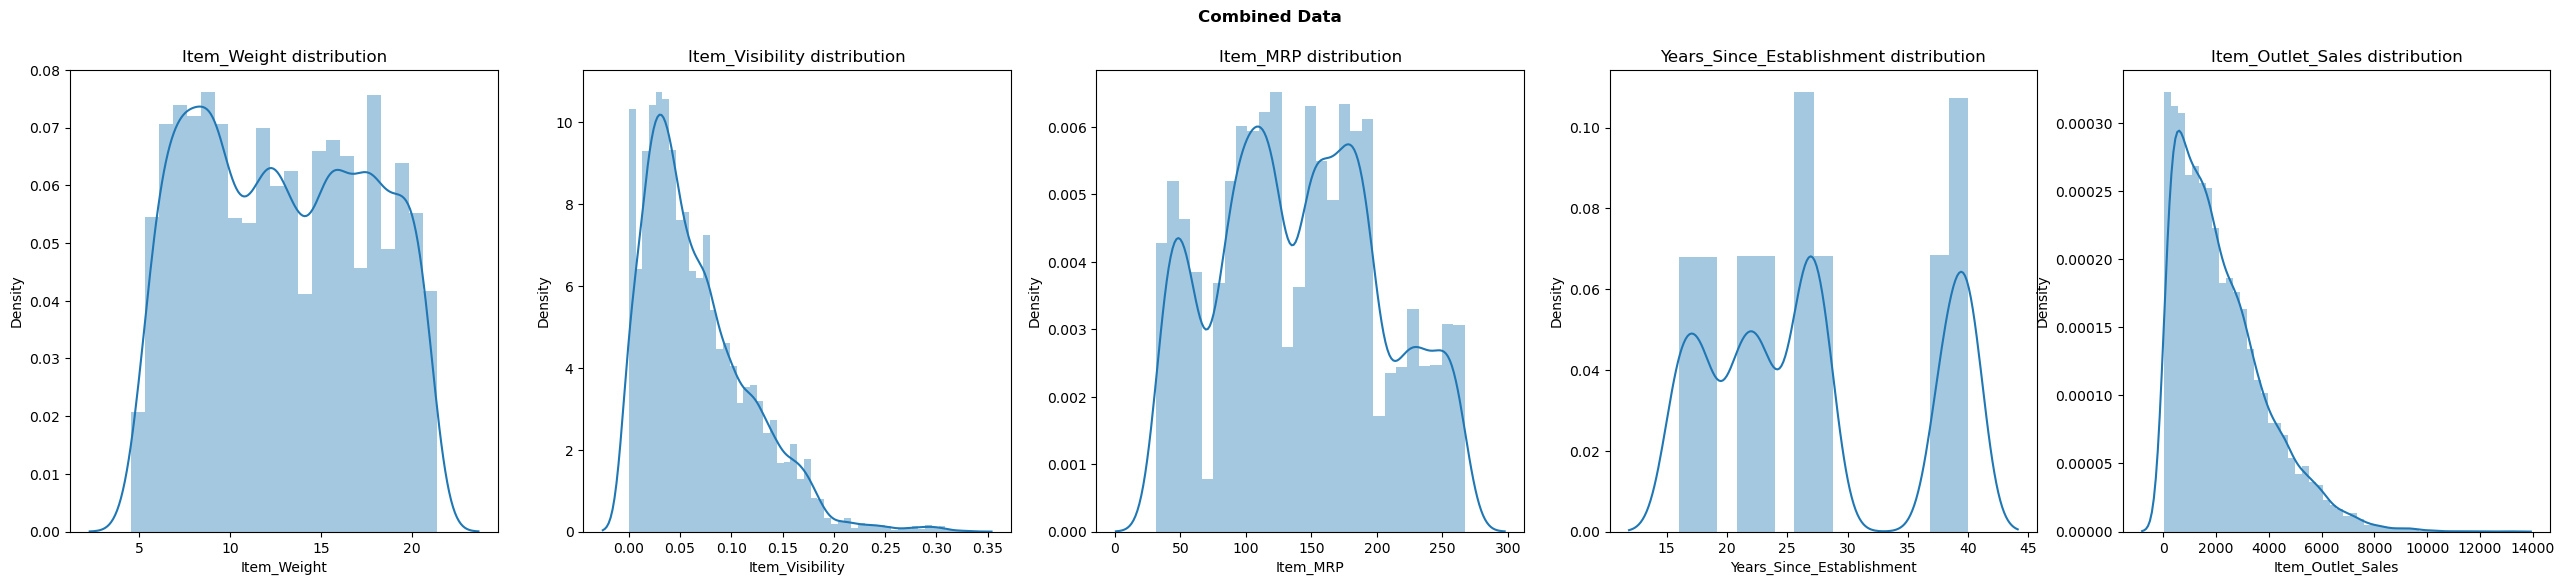

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(32, 6))
fig.suptitle('Combined Data', weight='bold')

for index, col in enumerate(combined_num_cols):
    sns.distplot(train_num_cols[col], kde=True, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

In [47]:
# Calculating statistics for combined numerical columns
combined_num_stats = pd.DataFrame({'skewness': combined_num_cols.skew(), 'kurtosis': combined_num_cols.kurt()})
combined_num_stats = pd.concat([combined_num_stats, combined_num_cols.describe().T], axis=1)
combined_num_stats


skewness  kurtosis    count         mean  \
Item_Weight                0.100417 -1.227420  14204.0    12.793380   
Item_Visibility            1.195175  1.820071  14204.0     0.065953   
Item_MRP                   0.130728 -0.893856  14204.0   141.004977   
Years_Since_Establishment  0.396465 -1.205867  14204.0    27.169319   
Item_Outlet_Sales          1.177531  1.615877   8523.0  2181.288914   

                                   std     min         25%          50%  \
Item_Weight                   4.651716   4.555    8.710000    12.600000   
Item_Visibility               0.051459   0.000    0.027036     0.054021   
Item_MRP                     62.086938  31.290   94.012000   142.247000   
Years_Since_Establishment     8.371664  16.000   21.000000    26.000000   
Item_Outlet_Sales          1706.499616  33.290  834.247400  1794.331000   

                                   75%           max  
Item_Weight                  16.750000     21.350000  
Item_Visibility               0.094037      0.328391  
Item_MRP                    185.855600    266.888400  
Years_Since_Establishment    38.000000     40.000000  
Item_Outlet_Sales          3101.296400  13086.964800

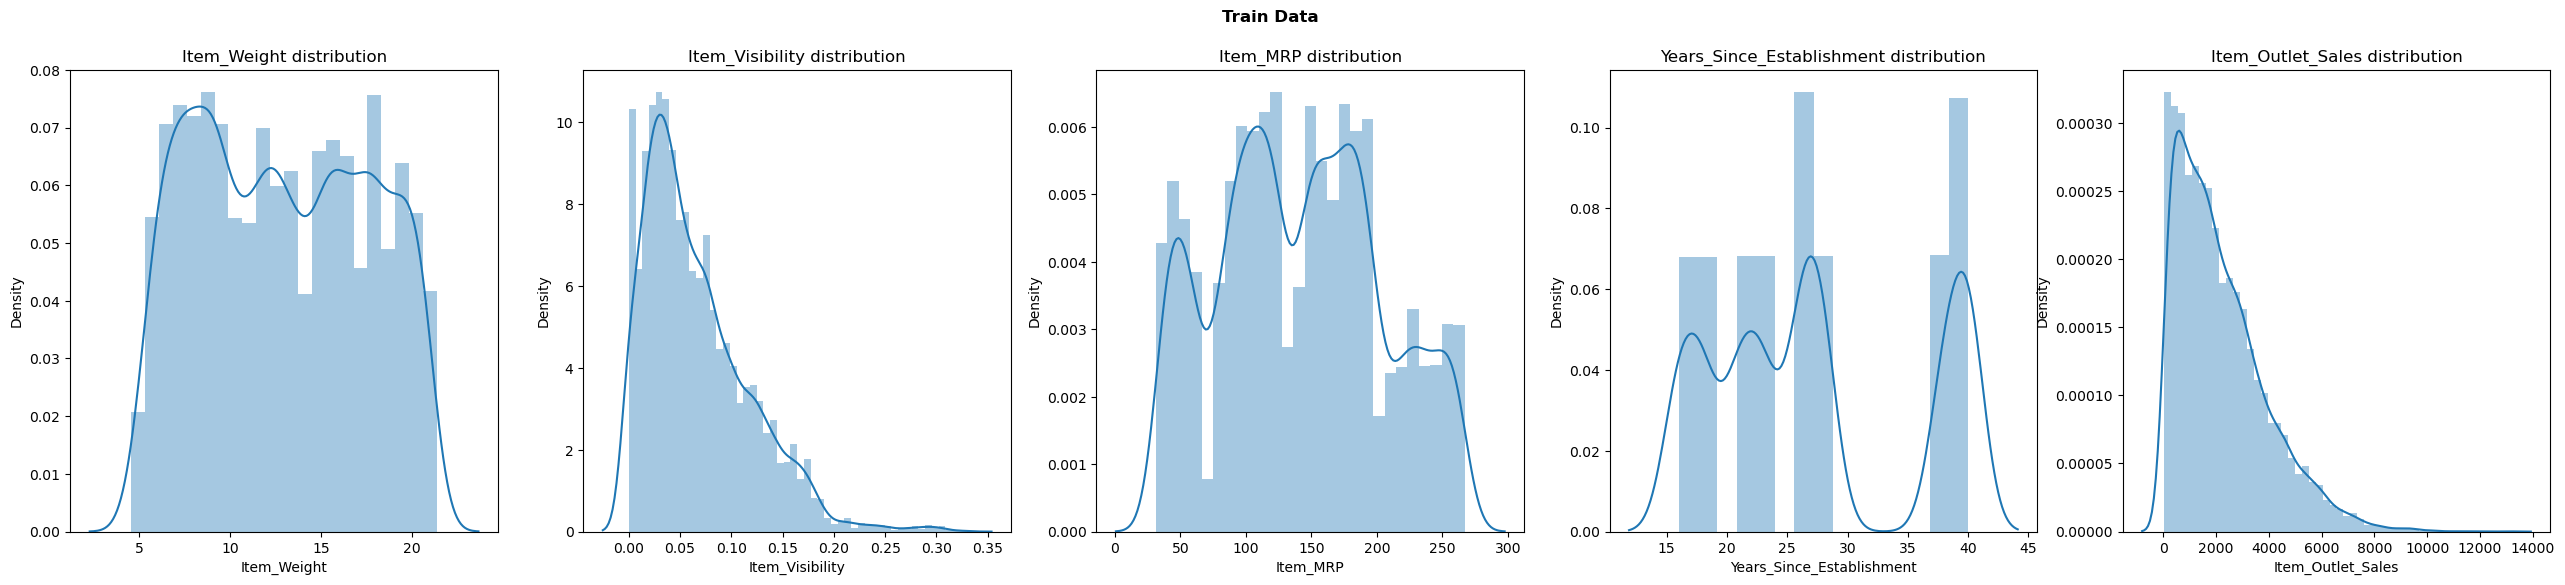

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(32, 6))
fig.suptitle('Train Data', weight='bold')

for index, col in enumerate(train_num_cols):
    sns.distplot(train_num_cols[col], kde=True, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

In [49]:
# Calculating statistics for training numerical columns
train_num_stats = pd.DataFrame({'skewness': train_num_cols.skew(), 'kurtosis': train_num_cols.kurt()})
train_num_stats = pd.concat([train_num_stats, train_num_cols.describe().T], axis=1)
train_num_stats


skewness  kurtosis   count         mean  \
Item_Weight                0.071014 -1.230516  8523.0    12.873623   
Item_Visibility            1.167091  1.679445  8523.0     0.066132   
Item_MRP                   0.127202 -0.889769  8523.0   140.992782   
Years_Since_Establishment  0.396641 -1.205694  8523.0    27.168133   
Item_Outlet_Sales          1.177531  1.615877  8523.0  2181.288914   

                                   std     min         25%          50%  \
Item_Weight                   4.645893   4.555    8.785000    12.600000   
Item_Visibility               0.051598   0.000    0.026989     0.053931   
Item_MRP                     62.275067  31.290   93.826500   143.012800   
Years_Since_Establishment     8.371760  16.000   21.000000    26.000000   
Item_Outlet_Sales          1706.499616  33.290  834.247400  1794.331000   

                                   75%           max  
Item_Weight                  16.850000     21.350000  
Item_Visibility               0.094585      0.328391  
Item_MRP                    185.643700    266.888400  
Years_Since_Establishment    38.000000     40.000000  
Item_Outlet_Sales          3101.296400  13086.964800

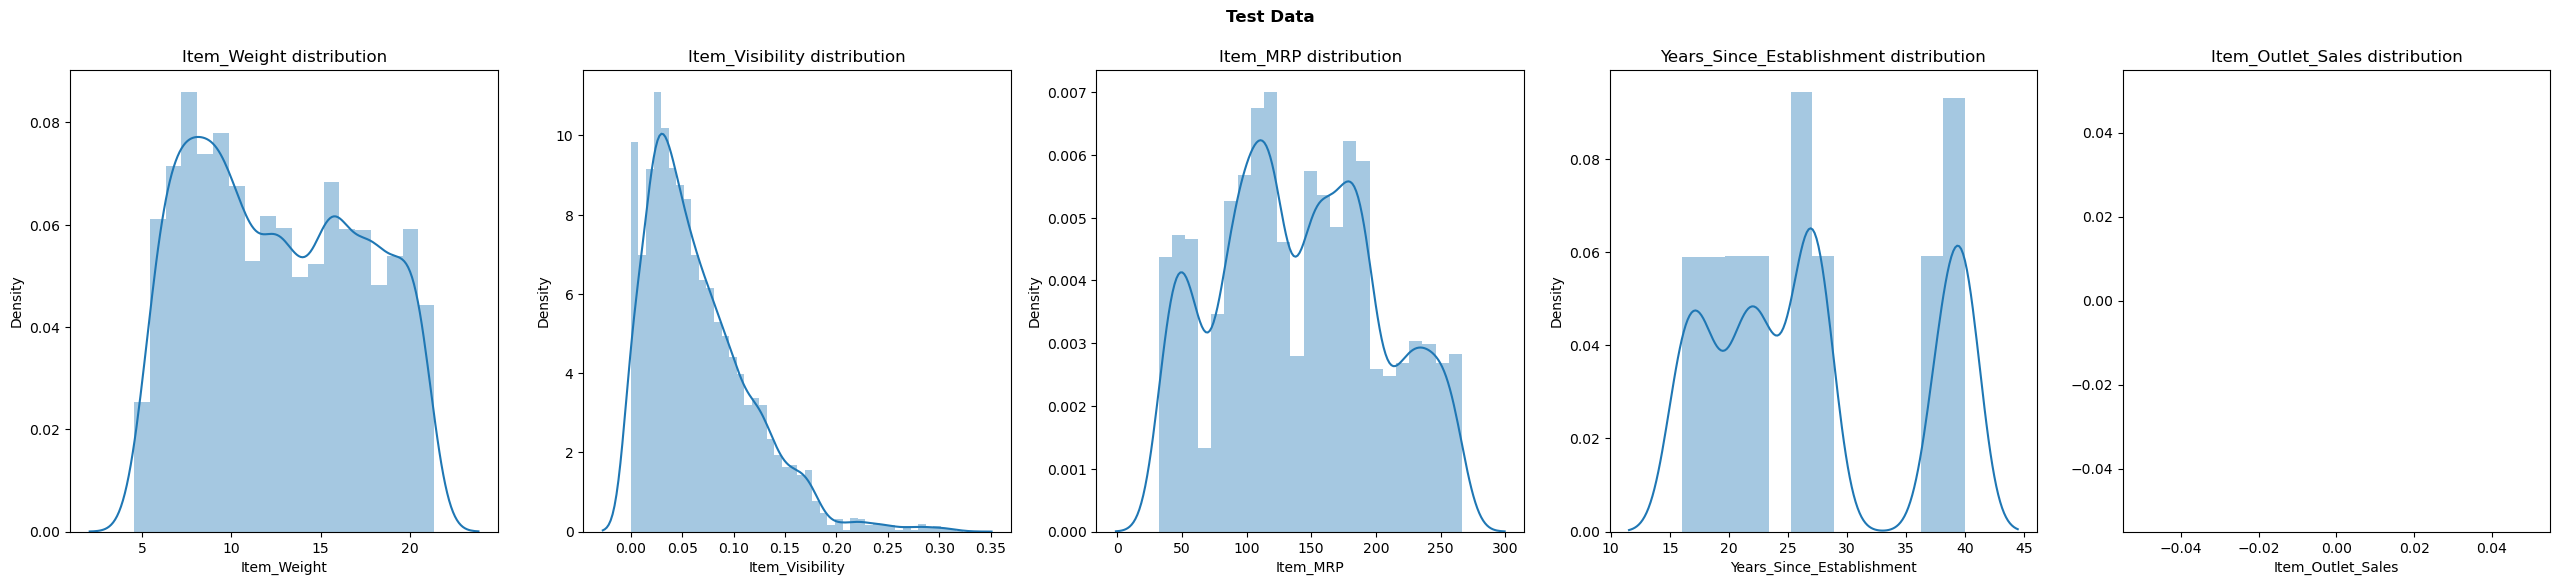

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(32, 6))
fig.suptitle('Test Data', weight='bold')

for index, col in enumerate(test_num_cols):
    sns.distplot(test_num_cols[col], kde=True, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

In [51]:
# Calculating statistics for testing numerical columns
test_num_stats = pd.DataFrame({'skewness': test_num_cols.skew(), 'kurtosis': test_num_cols.kurt()})
test_num_stats = pd.concat([test_num_stats, test_num_cols.describe().T], axis=1)
test_num_stats


skewness  kurtosis   count        mean        std  \
Item_Weight                0.144796 -1.217919  5681.0   12.672996   4.658256   
Item_Visibility            1.238312  2.040199  5681.0    0.065684   0.051252   
Item_MRP                   0.136182 -0.900203  5681.0  141.023273  61.809091   
Years_Since_Establishment  0.396306 -1.206132  5681.0   27.171097   8.372256   
Item_Outlet_Sales               NaN       NaN     0.0         NaN        NaN   

                              min        25%         50%         75%  \
Item_Weight                 4.555   8.615000   12.350000   16.700000   
Item_Visibility             0.000   0.027047    0.054154    0.093463   
Item_MRP                   31.990  94.412000  141.415400  186.026600   
Years_Since_Establishment  16.000  21.000000   26.000000   38.000000   
Item_Outlet_Sales             NaN        NaN         NaN         NaN   

                                  max  
Item_Weight                 21.350000  
Item_Visibility              0.323637  
Item_MRP                   266.588400  
Years_Since_Establishment   40.000000  
Item_Outlet_Sales                 NaN

#### Outlier Detection Analysis

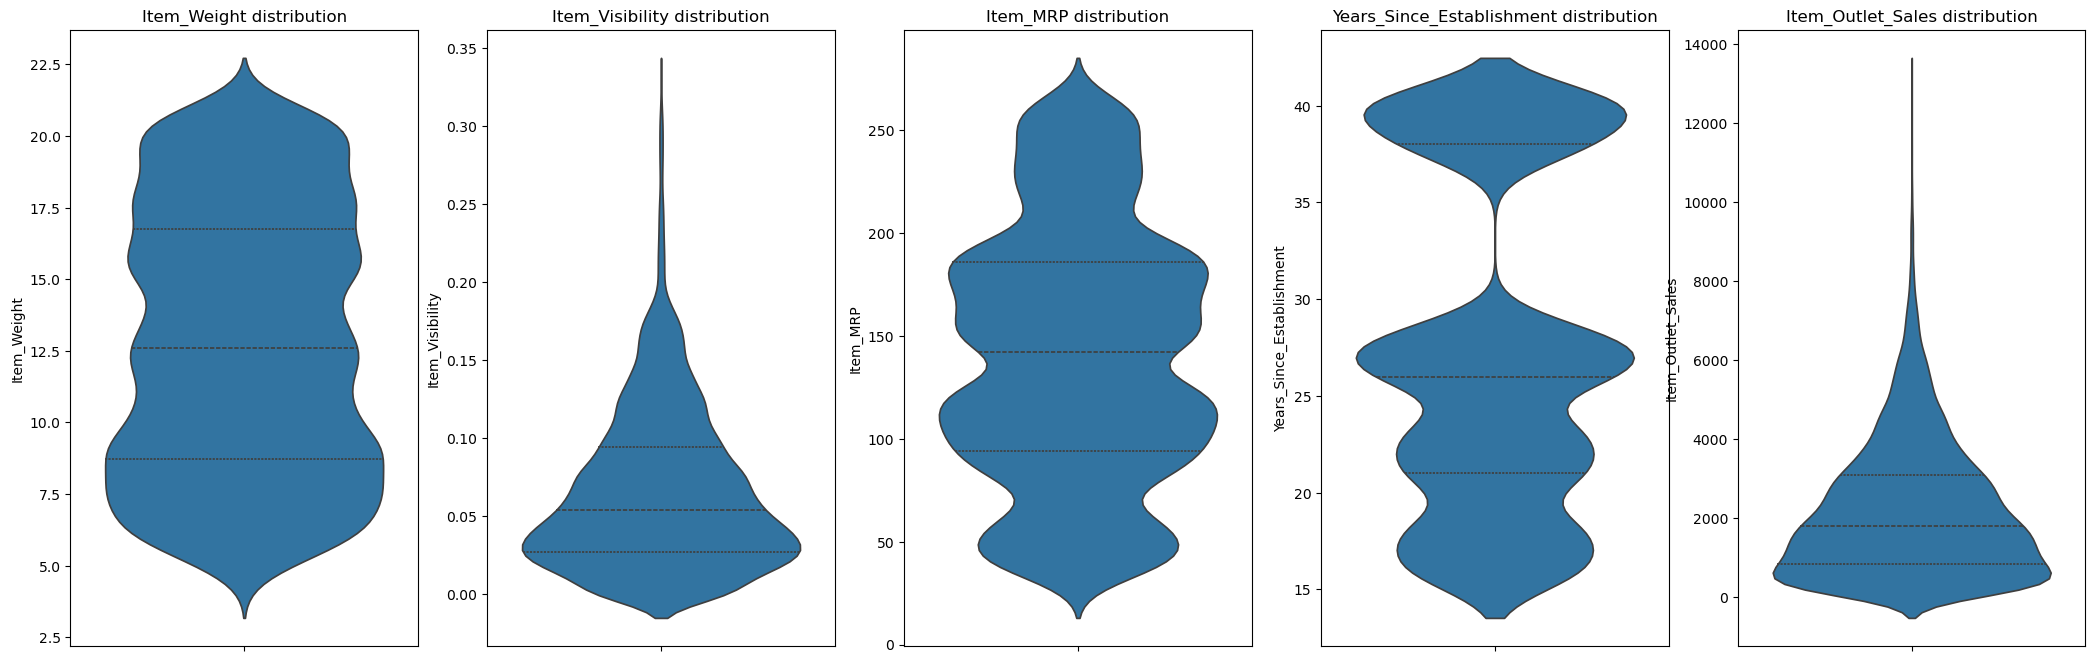

In [52]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
for index, col in enumerate(combined_num_cols):
    sns.violinplot(data=combined_num_cols, y=col, ax=ax[index], inner='quart')
    ax[index].set_title(f'{col} distribution')

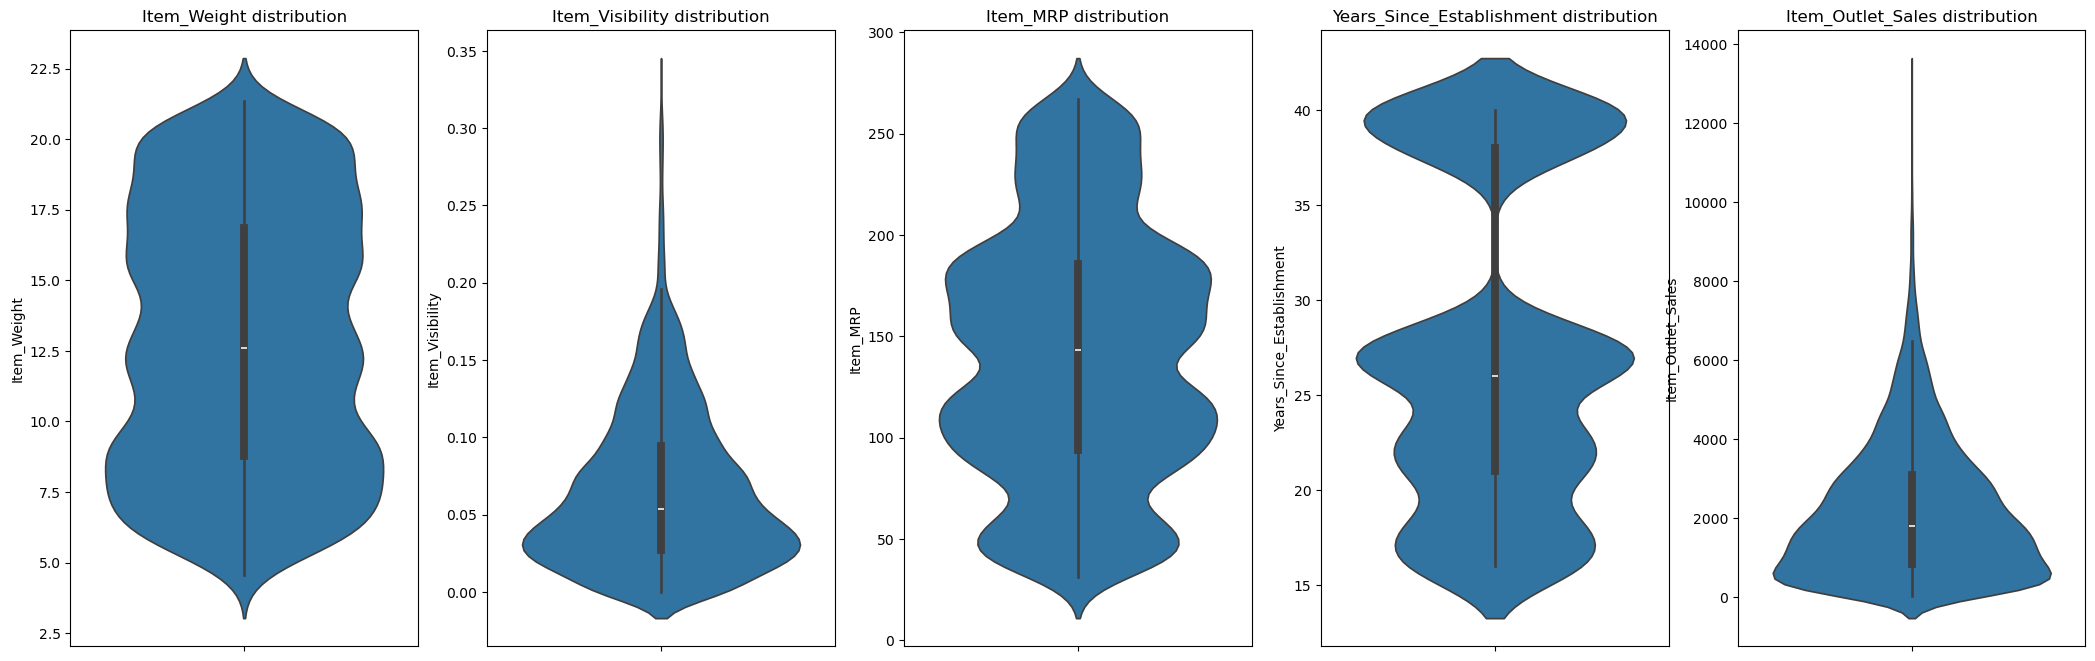

In [53]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
for index, col in enumerate(train_num_cols):
    sns.violinplot(data=train_num_cols, y=col, ax=ax[index], inner='box')
    ax[index].set_title(f'{col} distribution')

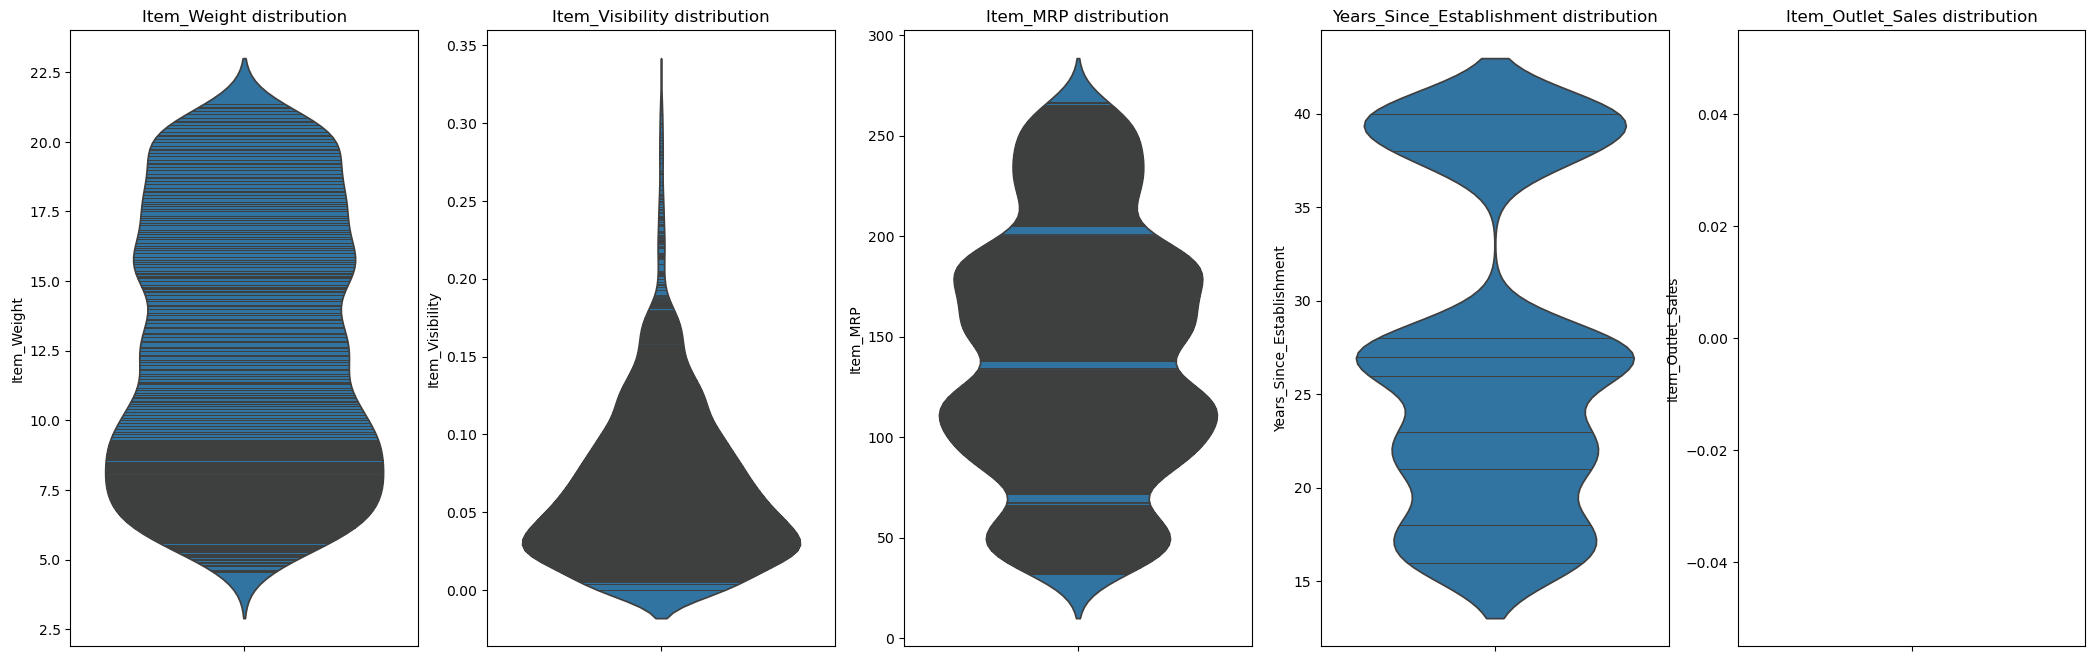

In [54]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
for index, col in enumerate(test_num_cols):
    sns.violinplot(data=test_num_cols, y=col, ax=ax[index], inner='stick')
    ax[index].set_title(f'{col} distribution')

#### Correlation Analysis

Text(0.5, 1.0, 'Combined Data Correlation Heatmap')

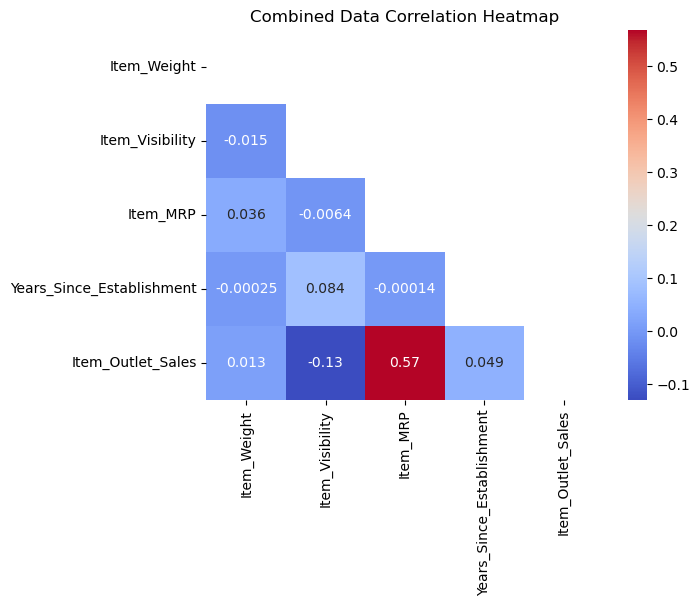

In [55]:
mask = np.triu(combined_num_cols.corr())
heatmap = sns.heatmap(combined_num_cols.corr(), annot=True, cmap='coolwarm', mask=mask)
heatmap.set_title('Combined Data Correlation Heatmap')

Text(0.5, 1.0, 'Test Data Correlation Heatmap')

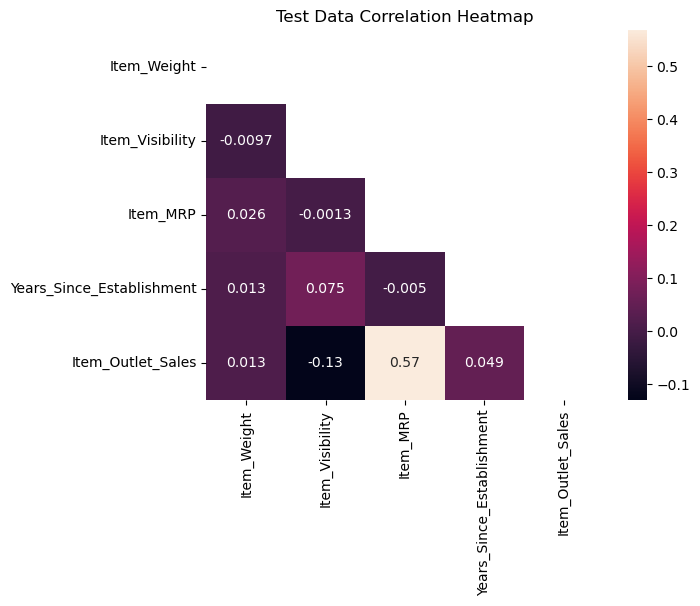

In [56]:
mask = np.triu(train_num_cols.corr())
heatmap = sns.heatmap(train_num_cols.corr(), annot=True, mask=mask)
heatmap.set_title('Test Data Correlation Heatmap')

Text(0.5, 1.0, 'Test Data Correlation Heatmap')

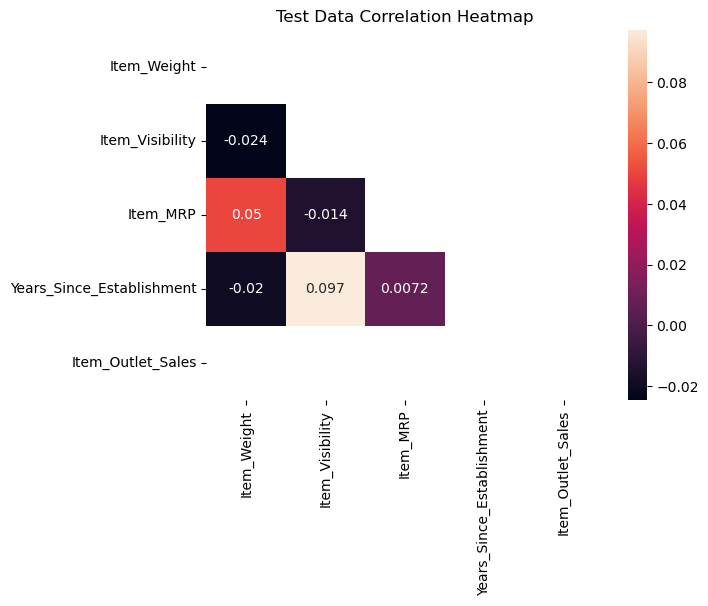

In [57]:
mask = np.triu(test_num_cols.corr())
heatmap = sns.heatmap(test_num_cols.corr(), annot=True, mask=mask)
heatmap.set_title('Test Data Correlation Heatmap')

### Categorical Columns Analysis

In [58]:
combined_cat_cols = combined.select_dtypes(include=['object'])
train_cat_cols = train.select_dtypes(include=['object'])
test_cat_cols = test.select_dtypes(include=['object'])

In [59]:
combined_cat_cols.nunique()

Item                    1559
Item_Fat_Content           2
Item_Type                 16
Outlet                    10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [60]:
train_cat_cols.nunique()

Item                    1559
Item_Fat_Content           2
Item_Type                 16
Outlet                    10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [61]:
test_cat_cols.nunique()

Item                    1543
Item_Fat_Content           2
Item_Type                 16
Outlet                    10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [62]:
combined_cat_cols = combined_cat_cols.drop(['Item'], axis=1)
train_cat_cols = train_cat_cols.drop(['Item'], axis=1)
test_cat_cols = test_cat_cols.drop(['Item'], axis=1)

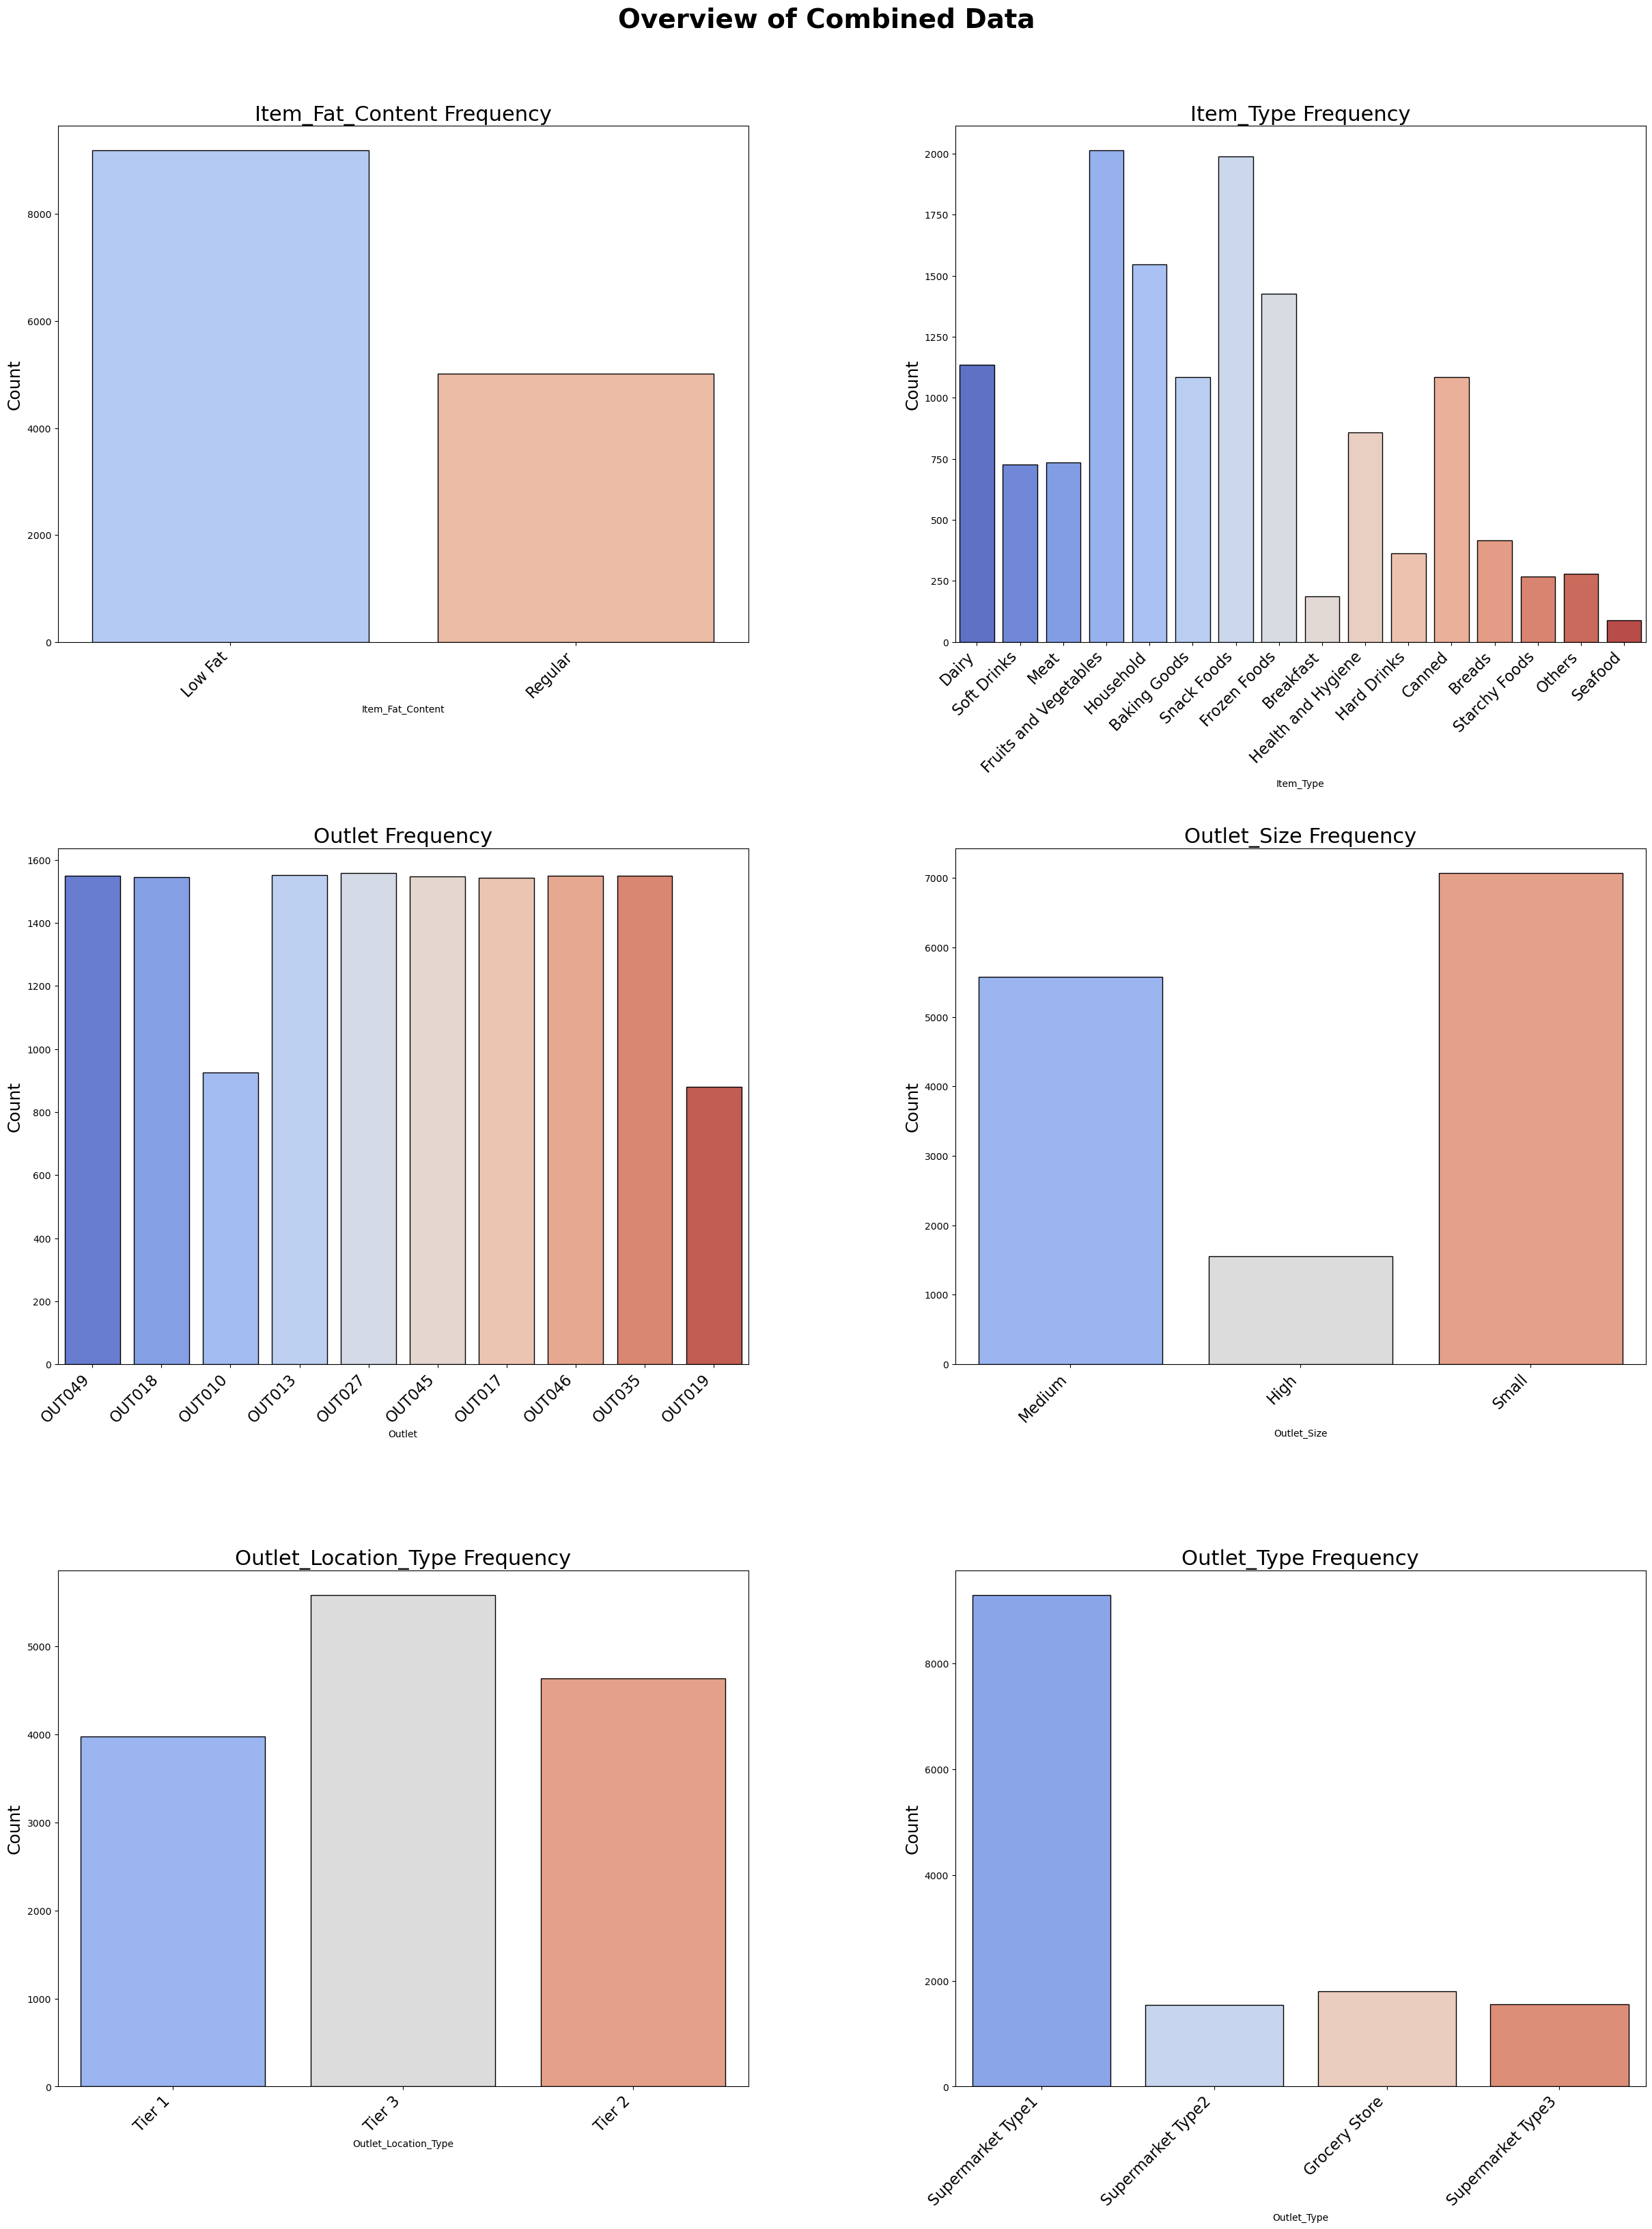

In [63]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 35))
fig.suptitle('Overview of Combined Data', fontsize=28, fontweight='bold')

for i, feature in enumerate(combined_cat_cols):
    # Calculate the subplot grid position
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    sns.countplot(x=feature, data=combined_cat_cols, ax=ax, palette='coolwarm', edgecolor='black')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    
    ax.set_title(f'{feature} Frequency', fontsize=22)
    
    ax.set_ylabel('Count', fontsize=18)

plt.subplots_adjust(top=0.93, hspace=0.4, wspace=0.3)
plt.show()


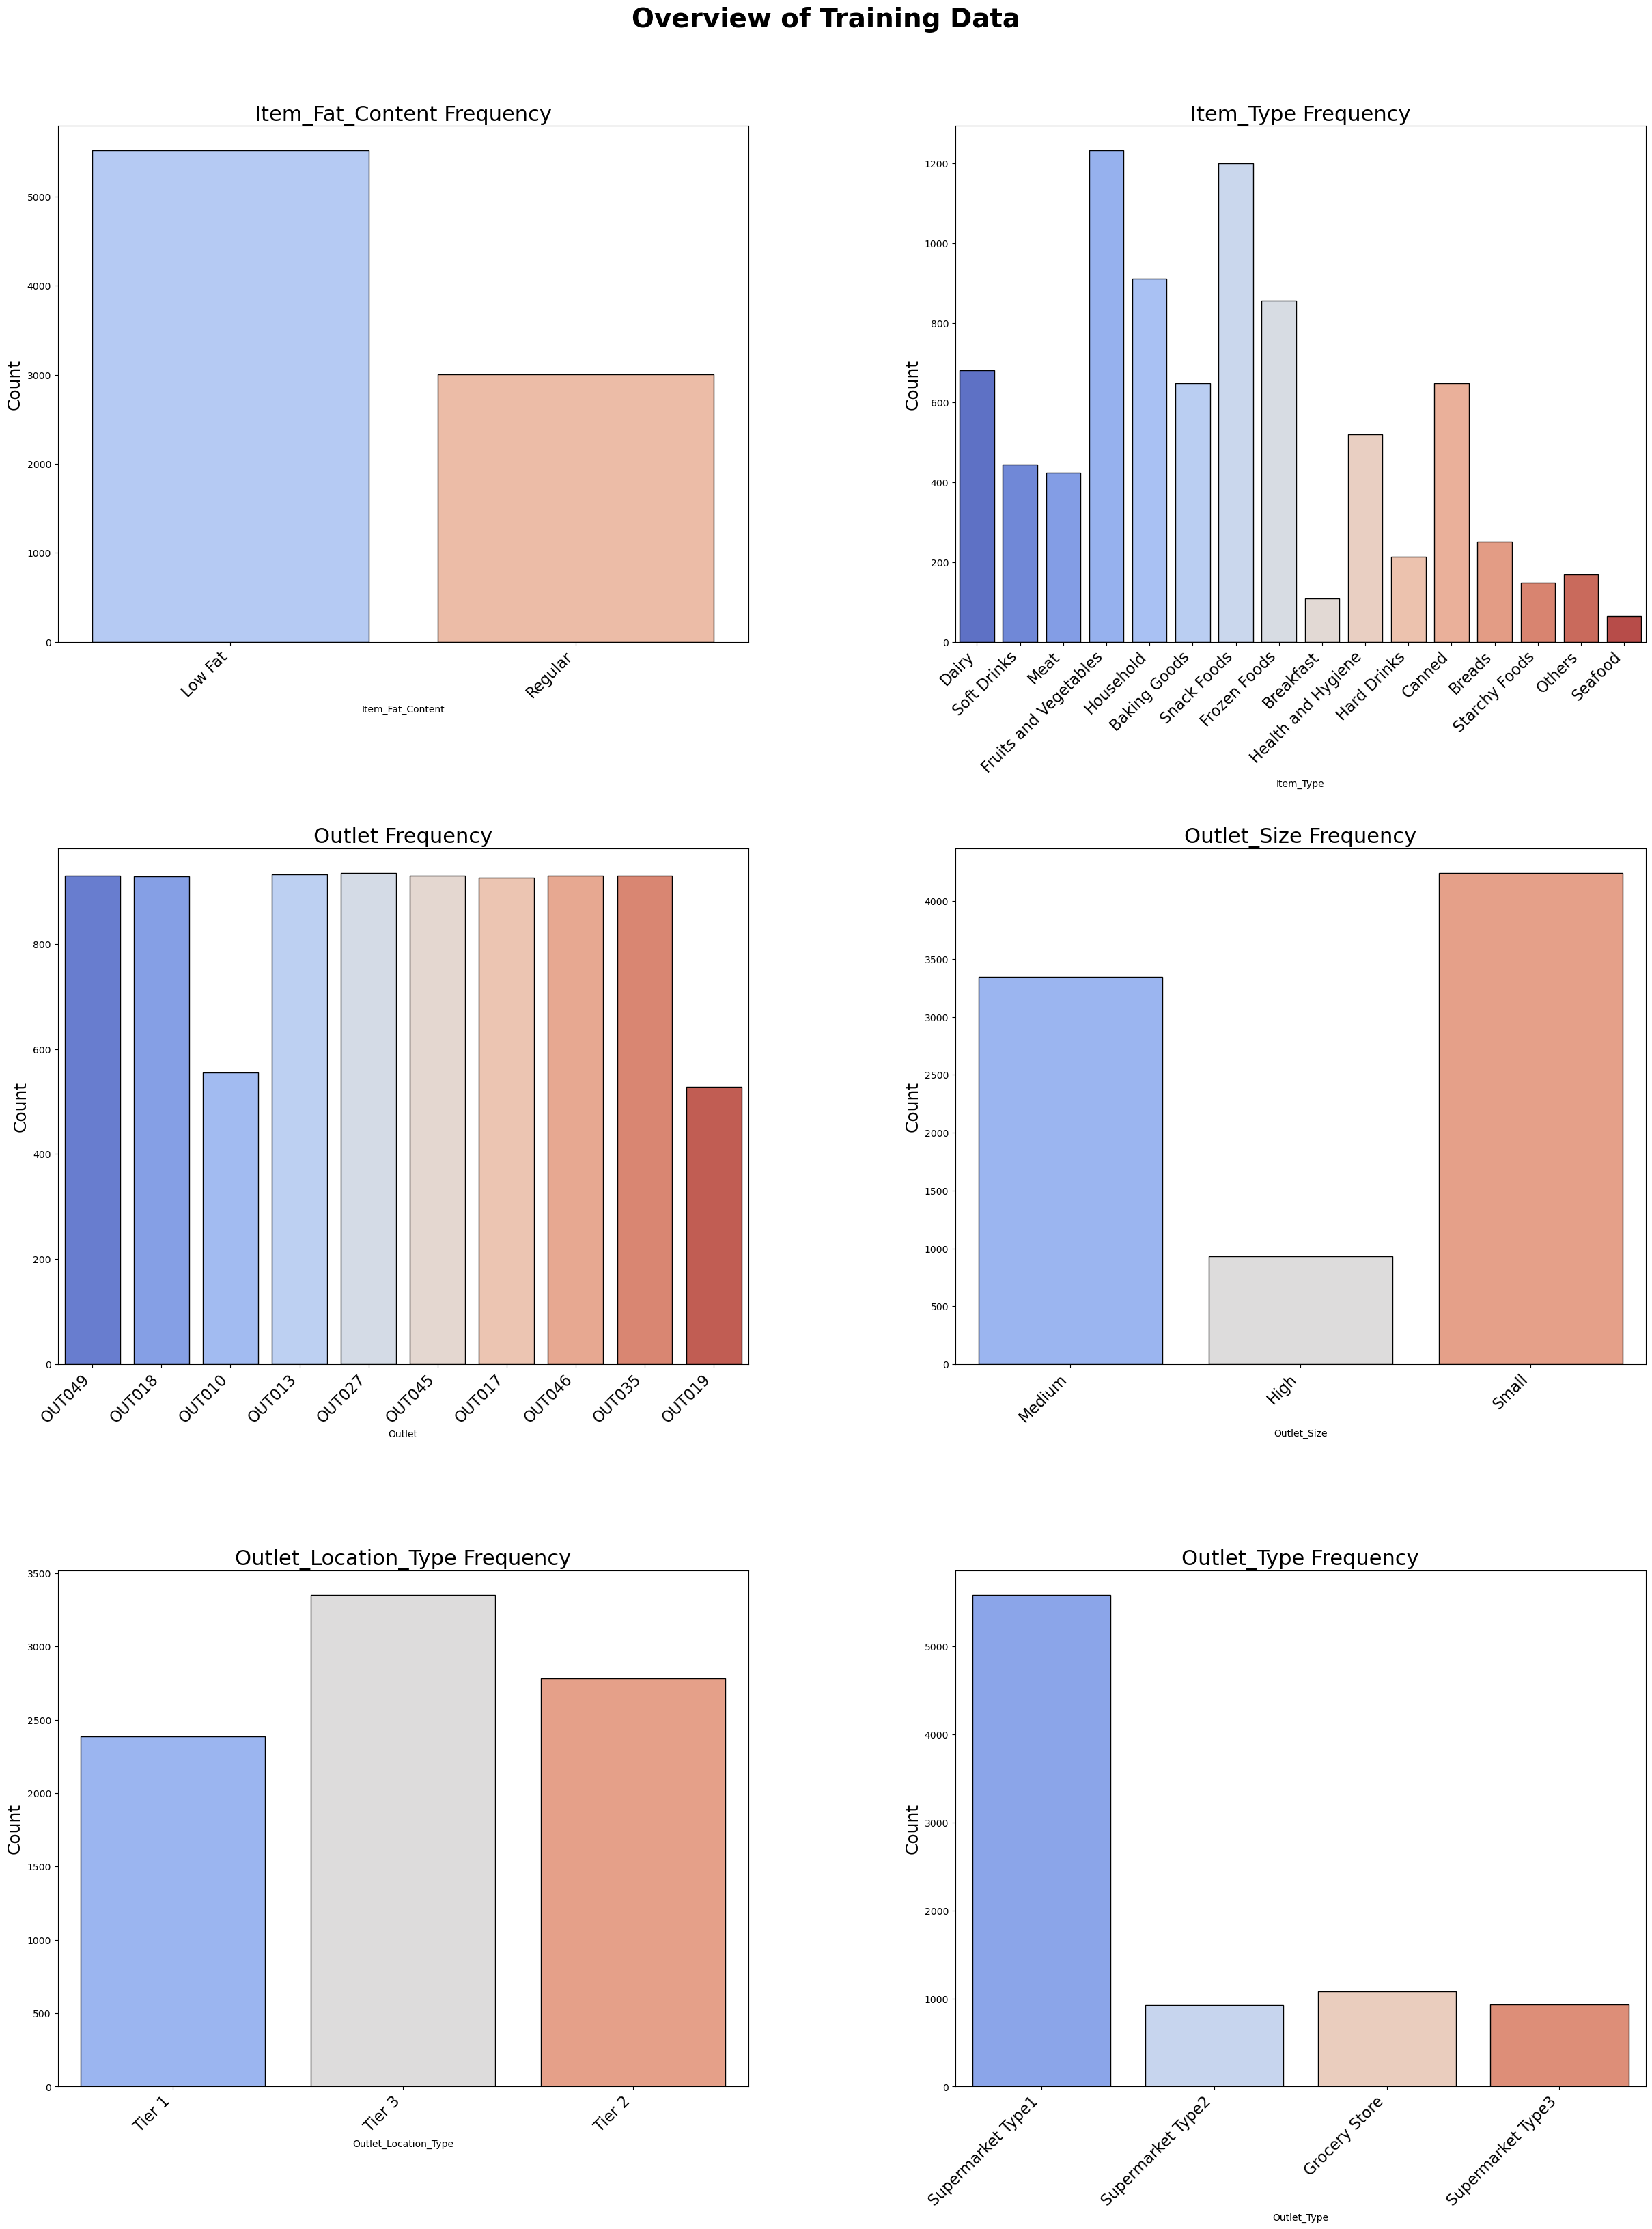

In [64]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 35))
fig.suptitle('Overview of Training Data', fontsize=28, fontweight='bold')

for i, feature in enumerate(train_cat_cols):
    # Calculate the subplot grid position
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    sns.countplot(x=feature, data=train_cat_cols, ax=ax, palette='coolwarm', edgecolor='black')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    
    ax.set_title(f'{feature} Frequency', fontsize=22)
    
    ax.set_ylabel('Count', fontsize=18)

plt.subplots_adjust(top=0.93, hspace=0.4, wspace=0.3)
plt.show()


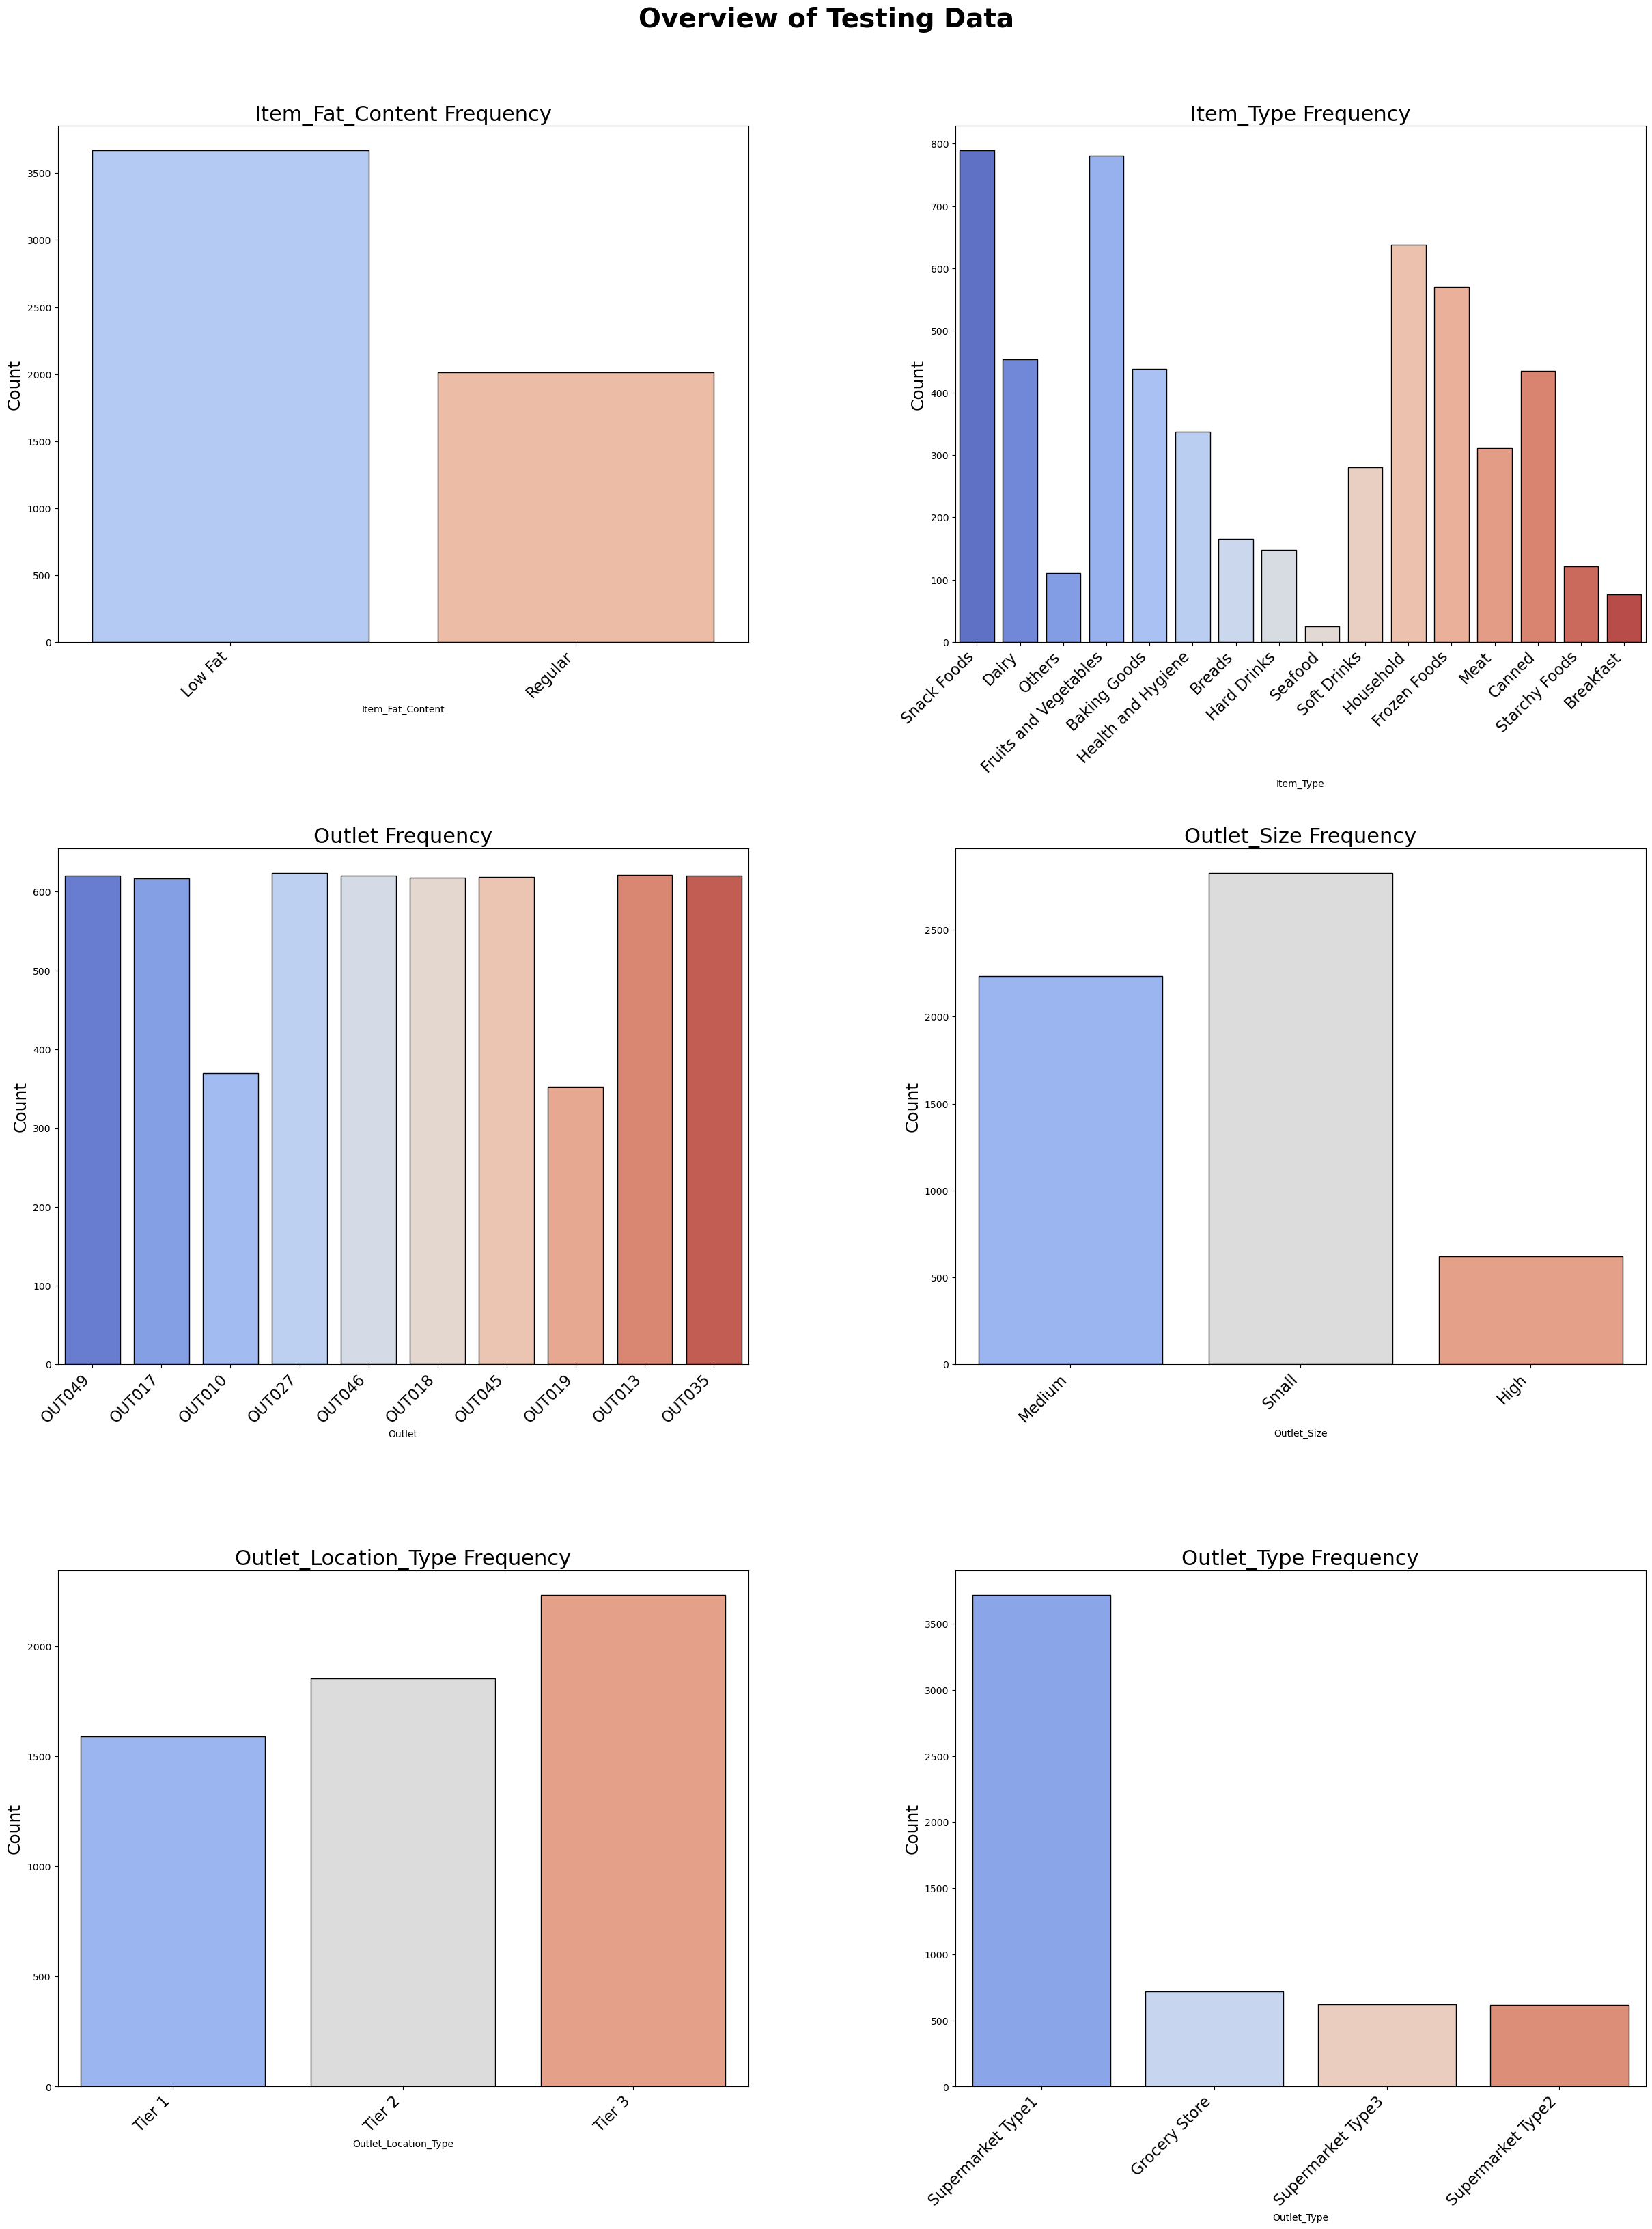

In [65]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 35))
fig.suptitle('Overview of Testing Data', fontsize=28, fontweight='bold')

for i, feature in enumerate(test_cat_cols):
    # Calculate the subplot grid position
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    sns.countplot(x=feature, data=test_cat_cols, ax=ax, palette='coolwarm', edgecolor='black')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    
    ax.set_title(f'{feature} Frequency', fontsize=22)
    
    ax.set_ylabel('Count', fontsize=18)

plt.subplots_adjust(top=0.93, hspace=0.4, wspace=0.3)
plt.show()


In [66]:
sales_train = train['Item_Outlet_Sales']


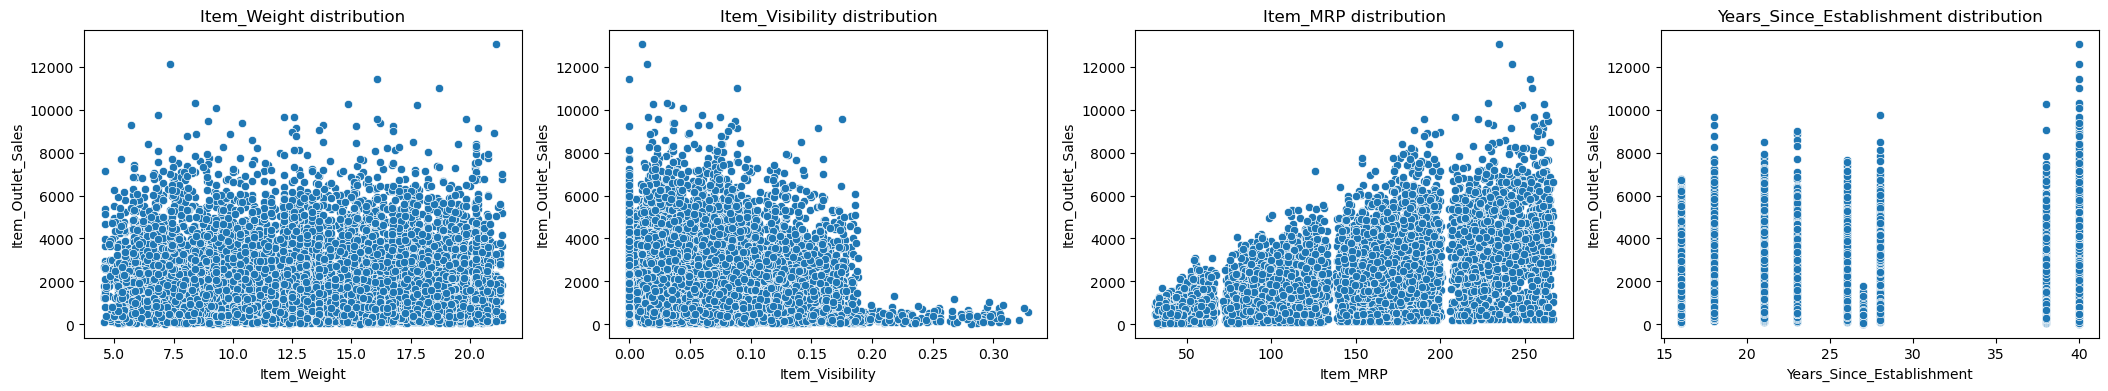

In [71]:
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP','Years_Since_Establishment']):
    sns.scatterplot(data=train,x=col, y=sales_train, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

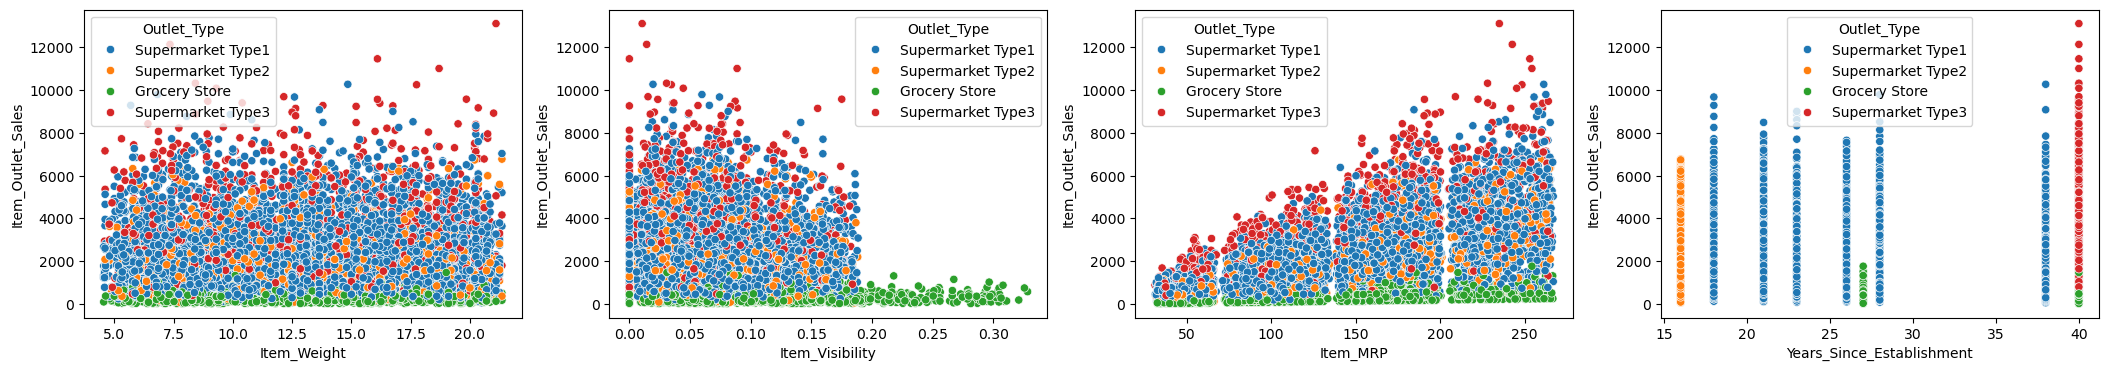

In [74]:
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP','Years_Since_Establishment']):
    sns.scatterplot(data=train,x=col, y=sales_train, ax=ax[index], hue='Outlet_Type')

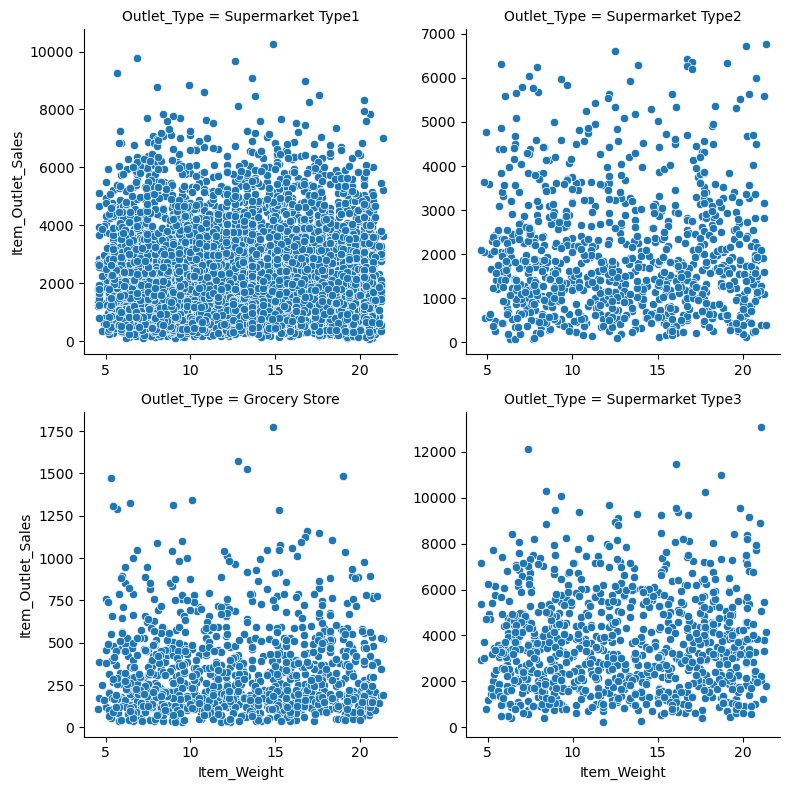

In [75]:
g = sns.FacetGrid(train, col="Outlet_Type", col_wrap=2, height=4, sharex=False, sharey=False)
g.map(sns.scatterplot, "Item_Weight", "Item_Outlet_Sales")


<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

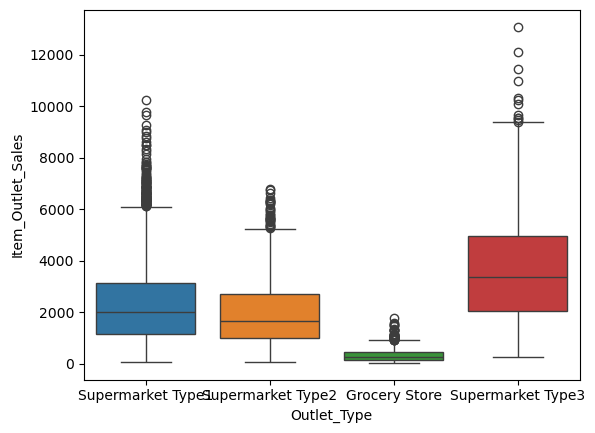

In [76]:
sns.boxplot(data=train, x="Outlet_Type", y="Item_Outlet_Sales", hue="Outlet_Type")


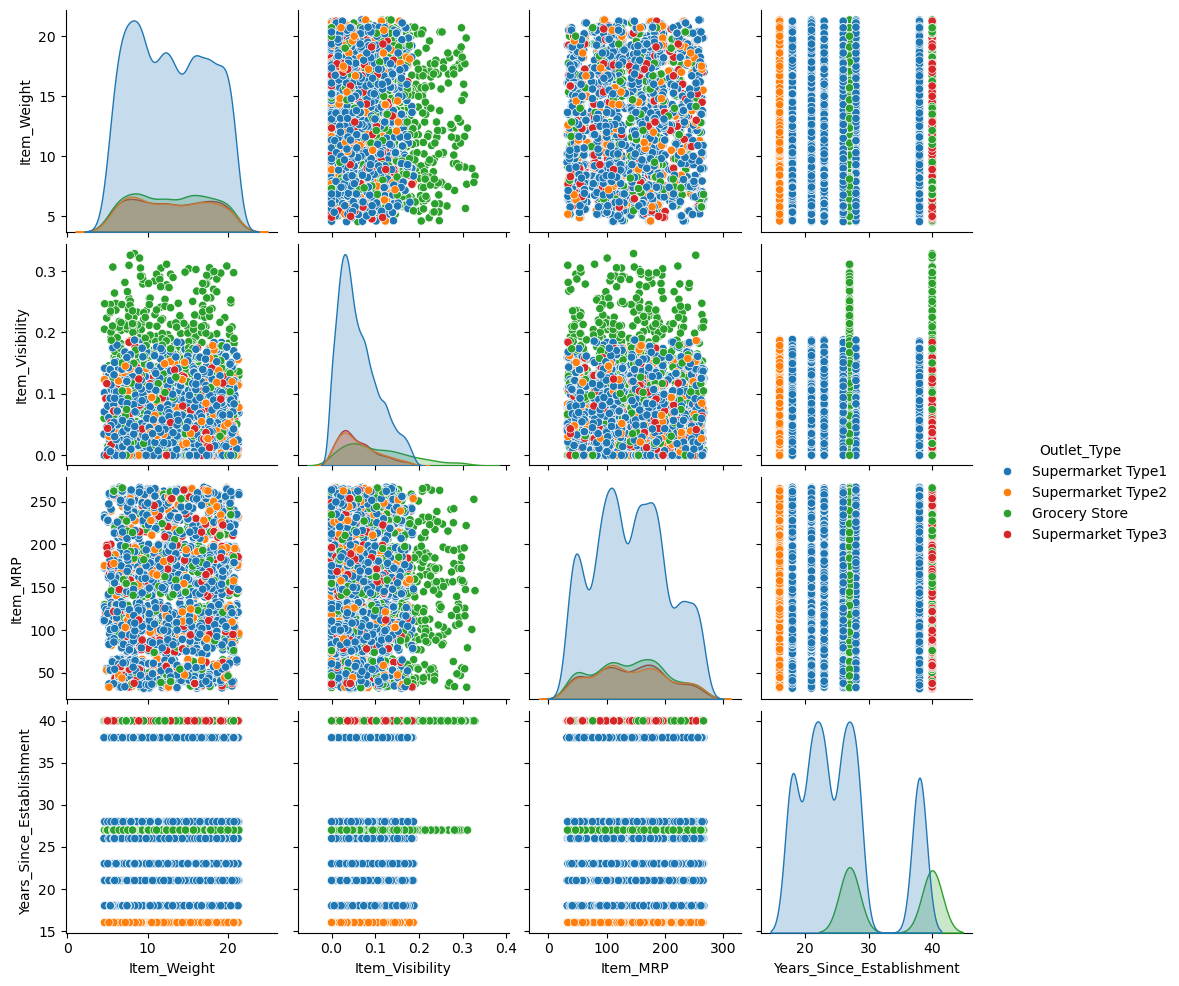

In [79]:
sns.pairplot(train, vars=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Years_Since_Establishment'], hue="Outlet_Type")


<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

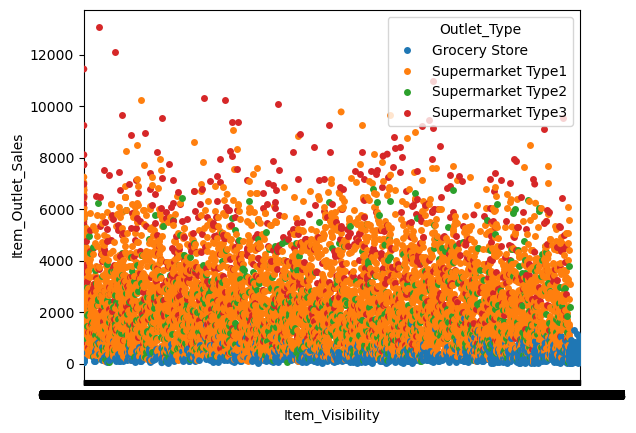

In [98]:
sns.swarmplot(data=train, x="Item_Visibility", y="Item_Outlet_Sales", hue="Outlet_Type")


Text(0, 0.5, 'Probability Density')

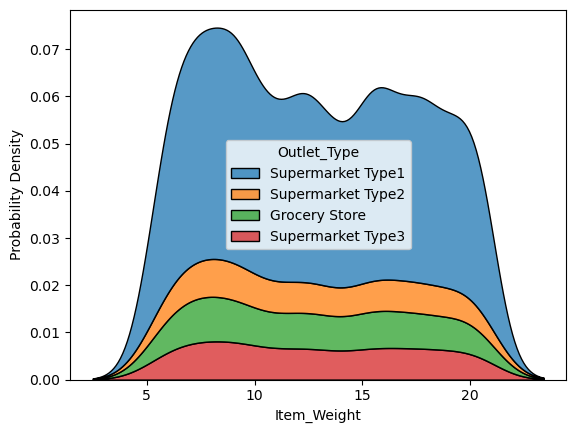

In [94]:
ax = sns.kdeplot(data=combined, x="Item_Weight", hue="Outlet_Type", multiple="stack")
ax.set_ylabel('Probability Density')


Text(0, 0.5, 'Probability Density')

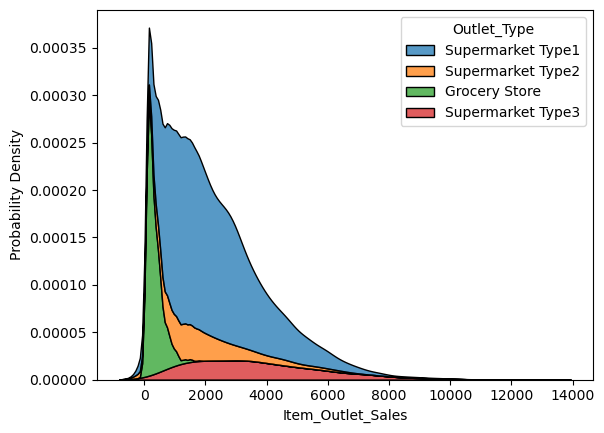

In [96]:
ax = sns.kdeplot(data=train, x="Item_Outlet_Sales", hue="Outlet_Type", multiple="stack")
ax.set_ylabel('Probability Density')
